In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

In [8]:
import numpy as np
from matplotlib import pyplot as plt

## Duality

In this section, we will show a minimal case of minimization via duality.

A minimal case of an minimization problem, where the optimal value is $p^*$:

$$
\mathrm{min} f_0(x) \\
\mathrm{subject~to~} f_1(x) \le 0
$$

**Attention**: The function can be non-convex.

We write the *Lagrangian* associated with the problem:

$$
L(\lambda, x) = f_0(x) + \lambda f_1(x)
$$

**Attention**: The Lagrangian is a function of $\lambda$ and $x$ .

The corresponding *Lagrange dual function* is:

$$
g(\lambda) = \inf\limits_{x} (f_0(x) + \lambda f_1(x))
$$

**Attention**: The dual function is a function of $\lambda$ .


We can find an approximated minimum of the original question via maximizing the $g(\lambda)$.

But how can this happen?

In [157]:
def f0(x):
    return 3 * np.sin(2 * x + 3) + 3 * x + 5 

def f1(x):
    return 3 * x * x + 1 * x - 3

def L(λ, x):
    return f0(x) + λ * f1(x)

### What does $\lambda$ do?

#### Key Points
- The curve is changing: $\lambda$ is a (linear) combination between $f_0$ and $f_1$. When $\lambda$ increases (from 0), it changes the shape of the Lagrangian from $f_0$ to $f_0 + \lambda f_1$.
- Some points never change: Any $\lambda$ will not change the value where $f_1(x) = 0$.

In the figure:
- Blue curve is $f_0$, Orange curve is $f_1$
- The domain is the area where $f_1 \le 0$
- Green dotted curves: Lagrangian with different $\lambda$
- Red crossed points: Minimum of each Lagrangian.

#### Key Findings

However $\lambda$ changes, $g(\lambda) \equiv \inf_x L(\lambda) < p^*$.


##### Mathmatical View 

Due to the infimum operation, the in-equality (between Lagrangian and Lagrange dual function) holds:
$$
g(\lambda) \equiv \inf_x L(\lambda) \le L(\lambda, x^*)
$$

Due to the definition of the Lagadian, the in-equality (between Lagrangian and primal function) holds:
$$
L(\lambda, x^*) \le f_0(x^*) \equiv \inf f_0(x)
$$

So we have:
$$
g(\lambda) \le \inf f_0(x)
$$

which indicates:
$$
\sup g(\lambda) \le \inf f_0(x)
$$



##### Vivid View

When $\lambda$ is **small**, 
- the red crossed points can be out of the domain
    - the curve is very close to $f_0$
    - but it ignores the constraint of $f_1$
- as long as you ignore the constraints, you can find a value as small as possible
    - yes, these values **are** the lower bound
    - but they are **trivial** and just bullshit

When $\lambda$ is **large**, 
- the red crossed points must appear in the domain
    - the curve is very close to $f_1$
    - it ignores $f_0$
- a larger $\lambda$ raises the value out of the domain greatly
- but a larger $\lambda$ tend to find an optimum close to the minimum of $f_1$


When $\lambda$ is **not too small and not too large**
- the curve still has the shape of $f_0$
- adding a small $f_1$ to penalize those infeasible points


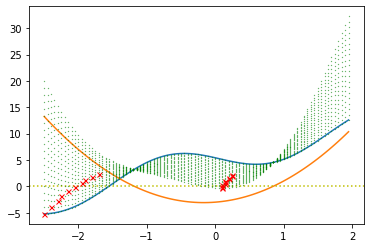

In [179]:
xs = np.arange(-2.5, 2, 0.05)
plt.plot(xs, f0(xs))
plt.plot(xs, f1(xs))
plt.axhline(y=0, color='y', ls='dotted')

λs = np.arange(0, 2, 0.1)

for λ in λs:
    Ls = L(λ, xs)
    inf_g = min(Ls)
    inf_x = xs[np.argmin(Ls)]
    plt.plot(xs, Ls, 'g.', markersize=0.5)
    plt.plot(inf_x, inf_g, 'rx', markersize=5.0)
    


### What does $\inf \limits_x$ do?

Let's look at $g(\lambda) = \inf\limits_{x} (f_0(x) + \lambda f_1(x)))$, keep in mind that it is a function of $\lambda$, $x$ is just different parameters:

- $f_0(x) + \lambda f_1(x)$ is a family of affine functions
- $\inf\limits_{x}$ is a pointwise infimum, which preserves convexity

In a vivid way:
- Let's imagine those lines: $k_0 \lambda + b_0$, $k_1 \lambda + b_1$, $k_2 \lambda + b_2$ ... 
- We get the infimum of different lines at each $\lambda$.

So $g(\lambda)$ is a convex function!

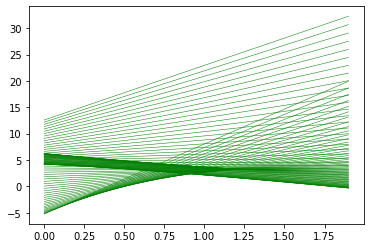

In [194]:
λs = np.arange(0, 2, 0.1)

bs = f0(xs)
ks = f1(xs)

for k, b in zip(ks, bs):
    gs = k * λs + b
    plt.plot(λs, gs, 'g-', linewidth=0.5)
    